# Visualizing Top 200 Highest Market Value Players

## Research Question

Which football academies produced the most valuable players in the world today?

## Considered footballers

- Top 200 most valuable players based on Transfermarkts "most valuable players" category.

## Academy Eligibility

- A player is attributed to an academy if they spent at least 3 years there during their youth development.
- If above does not apply, 

## Metrics

- Count the number of top 200 players produced by each academy

## Data Collection Workflow

### Step 1: Scraping the Top 200 Most Valuable Players on Transfermarkt

Our goal for this step is to extract the following data from the URL:

1. Player Name
2. Current Market Value
3. Profile Link

In [11]:
suppressPackageStartupMessages({
    library(tidyverse)
    library(ggplot2)
    library(RColorBrewer)
    library(stringr)
})

df <- read.csv("df.csv")

In [14]:
df <- df %>%
    mutate(mv = str_replace_all(mv, "[^\\d\\.]", "") %>%
           as.numeric())
head(df)

,X,player,url,mv,citizenship,position,foot,current_club,youth_club,youth_club_country
,<int>,<chr>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,Erling Haaland,https://www.transfermarkt.com/erling-haaland/profil/spieler/418560,200,Norway,Attack - Centre-Forward,left,Manchester City,Bryne FK Yth.,Norway
2,2,Vinicius Junior,https://www.transfermarkt.com/vinicius-junior/profil/spieler/371998,200,Brazil,Attack - Left Winger,right,Real Madrid,Flamengo U20,Brazil
3,3,Jude Bellingham,https://www.transfermarkt.com/jude-bellingham/profil/spieler/581678,180,England,Midfield - Attacking Midfield,right,Real Madrid,Birmingham U18,England
4,4,Kylian Mbappé,https://www.transfermarkt.com/kylian-mbappe/profil/spieler/342229,180,France,Attack - Centre-Forward,right,Real Madrid,AS Bondy Yth.,France
5,5,Lamine Yamal,https://www.transfermarkt.com/lamine-yamal/profil/spieler/937958,150,Spain,Attack - Right Winger,left,FC Barcelona,Barça Youth,Spain
6,6,Bukayo Saka,https://www.transfermarkt.com/bukayo-saka/profil/spieler/433177,150,England,Attack - Right Winger,left,Arsenal FC,Watford Yth.,England


## Distribution of Market Value by Position

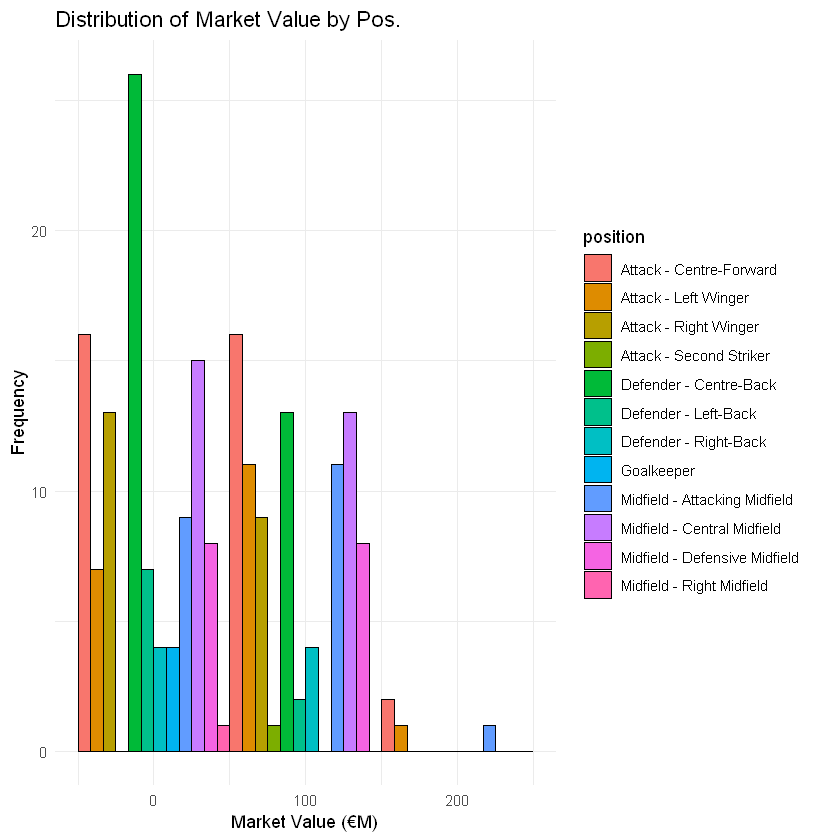

In [19]:
ggplot(df, aes(x = mv, fill = position)) +
    geom_histogram(binwidth = 100, color = "black", position = "dodge") +
    labs(title = "Distribution of Market Value by Pos.", x = "Market Value (€M)", y = "Frequency") +
    theme_minimal()

## Distribution of Market Value by Prefered Foot

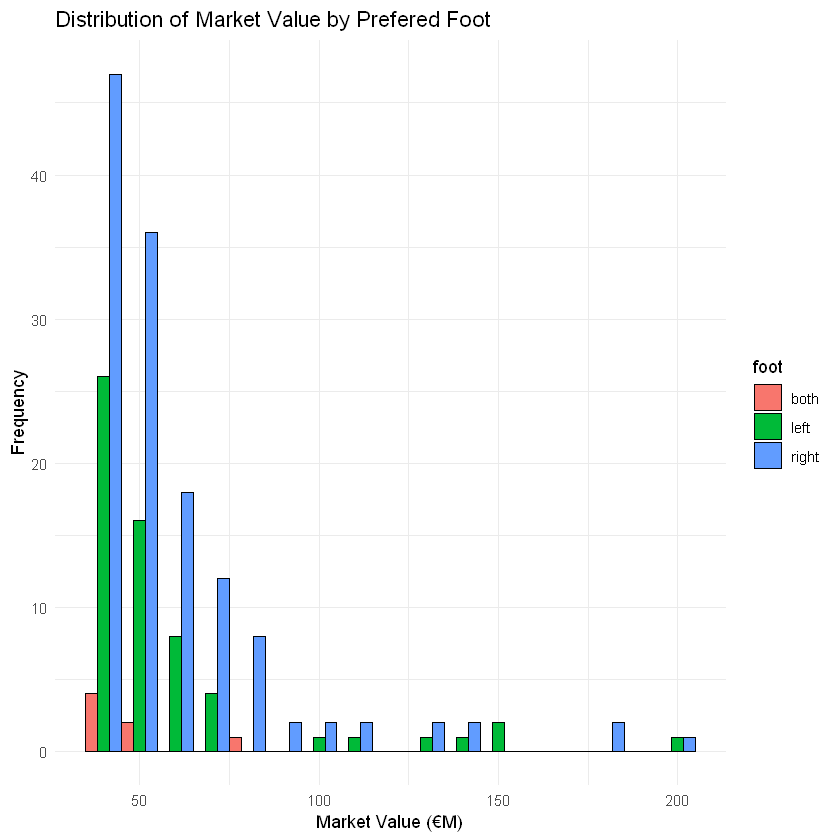

In [23]:
ggplot(df, aes(x = mv, fill = foot)) +
    geom_histogram(binwidth = 10, color = "black", position = "dodge") +
    labs(title = "Distribution of Market Value by Prefered Foot", x = "Market Value (€M)", y = "Frequency") +
    theme_minimal()

## Youth Club Influence: Players by Country

- Investigate how to plot world map in R (see link below)
https://stackoverflow.com/questions/69625716/how-to-plot-a-world-map-using-r

In [34]:
youth_country_count <- df %>%
    group_by(youth_club_country) %>%
    summarise(player_count = n()) %>%
    arrange(desc(player_count))

nationality_count <- df %>%
    group_by(citizenship) %>%
    summarise(player_count = n()) %>%
    arrange(desc(player_count))

youth_country_count
nationality_count

youth_club_country,player_count
<chr>,<int>
England,32
Spain,26
Brazil,23
France,22
Portugal,16
Netherlands,10
Germany,9
Italy,9
Argentina,7


citizenship,player_count
<chr>,<int>
England,27
Brazil,23
France,22
Spain,21
Portugal,16
Netherlands,12
Italy,9
Argentina,8
Germany,7


## Market value by Current Club

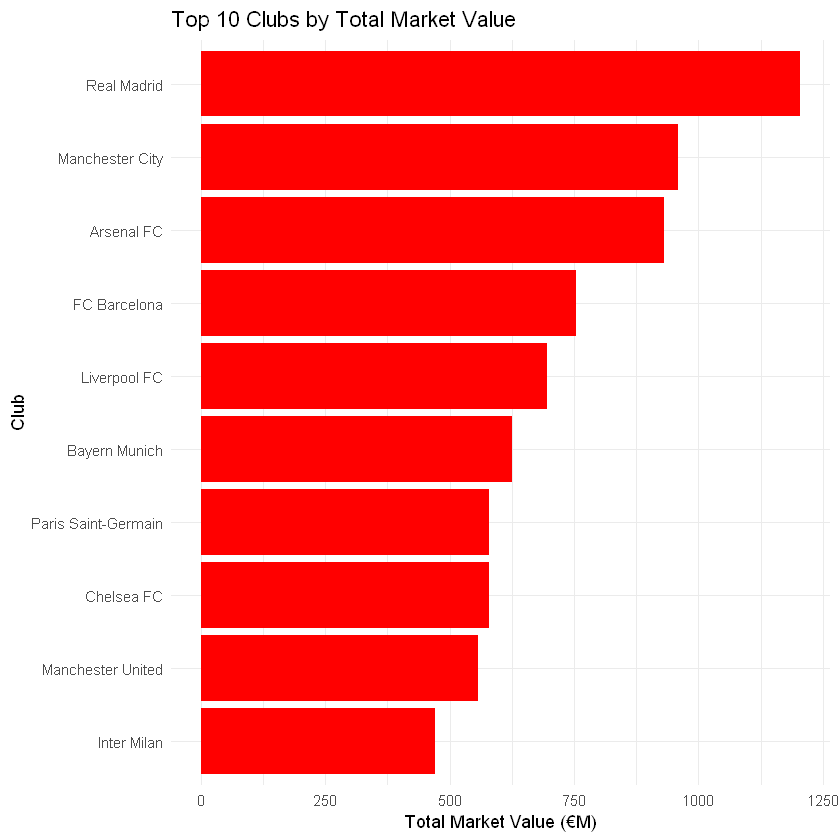

In [27]:
top_current_clubs <- df %>%
    group_by(current_club) %>%
    summarise(total_mv = sum(mv, na.rm = TRUE)) %>%
    arrange(desc(total_mv)) %>%
    slice(1:10)

ggplot(top_current_clubs, aes(x = reorder(current_club, total_mv), y = total_mv)) +
    geom_bar(stat = "identity", fill = "red") +
    coord_flip() +
    labs(title = "Top 10 Clubs by Total Market Value", x = "Club", y = "Total Market Value (€M)") + 
    theme_minimal()